In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import plotly.express as px
from folium import Map
from folium.plugins import HeatMap
import plotly
import plotly.graph_objs as go

In [58]:
crash_df = pd.read_csv('Dropped_crash_data.csv')

In [59]:
crash_df.head()

Unnamed: 0  YEAR QUARTER LIGHT_DESC  COUNTY_NO      COLLISION_TYPE_DESC  \
0        3553  2016      Q2   Daylight       24.0      Same Movement Angle   
1        6252  2016      Q3   Daylight       24.0                    Other   
2        9983  2017      Q4   Daylight       16.0                    Other   
3       11681  2016      Q4   Daylight       15.0           Single Vehicle   
4       11843  2017      Q2   Daylight       24.0  Same Direction Rear End   

     REPORT_NO            REPORT_TYPE  ACC_DATE  ACC_TIME AGENCY_CODE  RTE_NO  \
0   ADJ619002B  Property Damage Crash  20160517  06:00:00   BALTIMORE   147.0   
1   ADI1140056  Property Damage Crash  20160703  15:00:00   BALTIMORE   140.0   
2   HB04380008  Property Damage Crash  20171027  18:05:00      PGPARK   221.0   
3  MCP30050019           Injury Crash  20161012  11:15:00  MONTGOMERY  1274.0   
4   ADH2870003  Property Damage Crash  20170524  12:10:00   BALTIMORE   151.0   

     MAINROAD_NAME   LATITUDE  LONGITUDE  \
0       HARFORD RD  39.352170 -76.561586   
1  REISTERSTOWN RD  39.336613 -76.673808   
2    MCLAIN AVE #1  38.930621 -76.865437   
3       WHEATON LA  39.033970 -77.032113   
4       ERDMAN AVE  39.313917 -76.570124   

                                     LOCATION  
0  POINT (-76.5615856647491 39.3521697594666)  
1  POINT (-76.6738079488277 39.3366126270745)  
2  POINT (-76.8654370307922 38.9306207947397)  
3          POINT (-77.0321133333333 39.03397)  
4  POINT (-76.5701244771481 39.3139168602688)

In [71]:
crash_df_16 = crash_df.loc[crash_df['YEAR'] == 2016]
#crash_df_16 = crash_df_16.loc[crash_df_16['RTE_NO'] == 50.0]

In [61]:
crash_df_17 = crash_df.loc[crash_df['YEAR'] == 2017]
crash_df_17 = crash_df_17.loc[crash_df_17['RTE_NO'] == 50.0]

In [62]:
crash_df_18 = crash_df.loc[crash_df['YEAR'] == 2018]
crash_df_18 = crash_df_18.loc[crash_df_18['RTE_NO'] == 50.0]

In [63]:
crash_df_19 = crash_df.loc[crash_df['YEAR'] == 2019]
crash_df_19 = crash_df_19.loc[crash_df_19['RTE_NO'] == 50.0]

In [64]:
state_map = gpd.read_file('maryland.shp')

<AxesSubplot: >

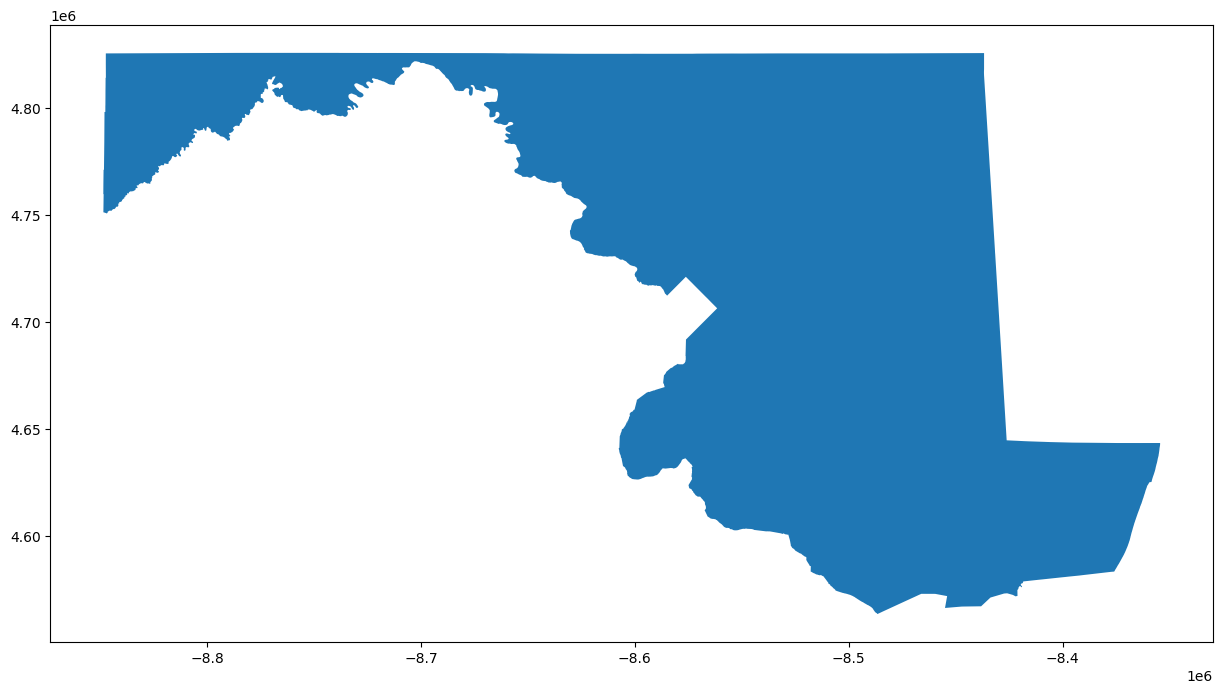

In [65]:
fig, ax = plt.subplots(figsize=(15,15))
state_map.plot(ax=ax)

In [76]:
#I made it so that this was just for 50. You can zoom in and look at all of the points. 
#https://python-charts.com/spatial/spatial-heatmap-plotly/
#I used that ^^^
fig = px.density_mapbox(crash_df_16, lat = 'LATITUDE', lon = 'LONGITUDE',
                        radius = 2,
                        center = dict(lat = 39, lon = -76),
                        zoom = 5.5,
                        mapbox_style = 'open-street-map',
                        color_continuous_scale = 'rainbow',
                        opacity = 0.5)
fig.show()

In [67]:
fig = px.density_mapbox(crash_df_17, lat = 'LATITUDE', lon = 'LONGITUDE',
                        radius = 9,
                        center = dict(lat = 39, lon = -76),
                        zoom = 5.5,
                        mapbox_style = 'open-street-map',
                        opacity = 0.5)
fig.show()

In [68]:
fig = px.density_mapbox(crash_df_18, lat = 'LATITUDE', lon = 'LONGITUDE',
                        radius = 9,
                        center = dict(lat = 39, lon = -76),
                        zoom = 5.5,
                        mapbox_style = 'open-street-map',
                        opacity = 0.5)
fig.show()

In [69]:
fig = px.density_mapbox(crash_df_19, lat = 'LATITUDE', lon = 'LONGITUDE',
                        radius = 9,
                        center = dict(lat = 39, lon = -76),
                        zoom = 5.5,
                        mapbox_style = 'open-street-map',
                        opacity = 0.5)
fig.show()

In [70]:
def get_location_interactive(crash_df_19, mapbox_style="open-street-map"):
    """Return a map with markers for houses based on lat and long.
    
    Parameters:
    ===========
    mapbox_style = str; options are following:
        > "white-bg" yields an empty white canvas which results in no external HTTP requests
        > "carto-positron", "carto-darkmatter", "stamen-terrain",
          "stamen-toner" or "stamen-watercolor" yield maps composed of raster tiles 
          from various public tile servers which do not require signups or access tokens
        > "open-street-map" does work 'latitude', 'longitude'
    """
    fig = px.scatter_mapbox(
        crash_df_19,
        lat=crash_df_19.LATITUDE,
        lon=crash_df_19.LONGITUDE,
        color_continuous_scale=["green", 'blue', 'red', 'gold'],
        zoom=11.5,
        height=700,
        title='Crash location',
        opacity=.5,
        center={
            'lat': crash_df_19.LATITUDE.mode()[0],
            'lon': crash_df_19.LONGITUDE.mode()[0]
        })
    fig.update_layout(mapbox_style=mapbox_style)
    fig.update_layout(margin={"r": 0, "l": 0, "b": 0})
    fig.show()
    pass

# function call
get_location_interactive(crash_df_19)